In [3]:
# Author: 胡 彩浩
# E-mail: Caihaohu@icloud.com

Using TensorFlow backend.


*************************
training size 100
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=100, Test Accuracy 80.011
*************************
training size 1000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=1000, Test Accuracy 83.864
*************************
training size 5000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=5000, Test Accuracy 84.210
*************************
training size 10000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=10000, Test Accuracy 84.099


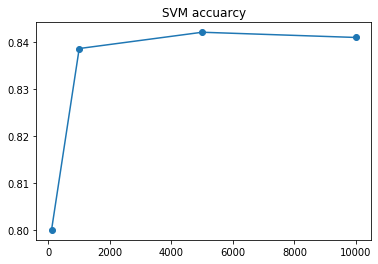

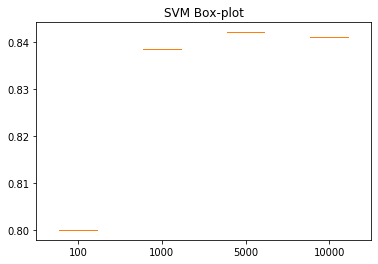

*************************
training size 100
training round 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

training round 2
training round 3
training round 4
training round 5
Train Size=100, Test Accuracy 72.242
*************************
training size 1000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=1000, Test Accuracy 83.732
*************************
training size 5000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=5000, Test Accuracy 84.122
*************************
training size 10000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=10000, Test Accuracy 84.025


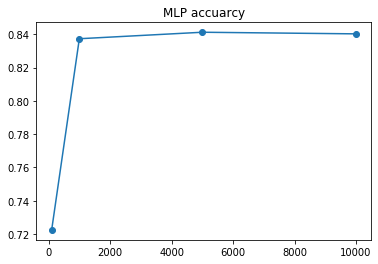

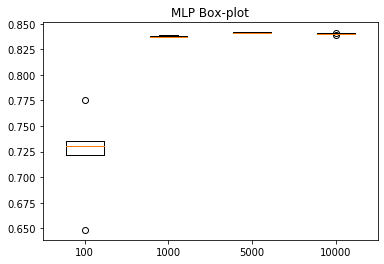

In [1]:
# 测试训练集大小的影响
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.svm import SVC

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
 
# 生成数据
def create_dataset(train_size, test_size=100000, noise=0.1):
    samples_size = train_size + test_size
    X, y = make_circles(n_samples=samples_size, noise=noise, random_state=1)
    X_train, X_test = X[test_size:, :], X[:test_size, :]
    y_train, y_test = y[test_size:], y[:test_size]
    return X_train, y_train, X_test, y_test
 
# mlp训练结果
def train_mlp_model(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=500, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

# svm训练结果
def train_svm_model(X_train, y_train, X_test, y_test):
    svc = SVC()
    svc.fit(X_train, y_train)
    test_acc = svc.score(X_test, y_test)
    return test_acc
 
# 取训练结果的平均值
def avg_score(train_size, model, n_repeats=5):
    X_train, y_train, X_test, y_test = create_dataset(train_size)
    scores = list()
    for i in range(n_repeats):
        print('training round '+ str(i+1))
        score = model(X_train, y_train, X_test, y_test)
        scores.append(score)
    return scores
 
# 测试不同训练集大小
sizes = [100, 1000, 5000, 10000]
score_sets, means = list(), list()
for train_size in sizes:
    print("*************************")
    print("training size "+str(train_size))
    scores = avg_score(train_size, train_svm_model)
    score_sets.append(scores)
    mean_score = mean(scores)
    means.append(mean_score)
    print('Train Size=%d, Test Accuracy %.3f' % (train_size, mean_score*100))
plt.title("SVM accuarcy")
plt.plot(sizes, means, marker='o')
plt.show()
plt.title("SVM Box-plot")
plt.boxplot(score_sets, labels=sizes)
plt.show()

# 测试不同训练集大小
sizes = [100, 1000, 5000, 10000]
score_sets, means = list(), list()
for train_size in sizes:
    print("*************************")
    print("training size "+str(train_size))
    scores = avg_score(train_size, train_mlp_model)
    score_sets.append(scores)
    mean_score = mean(scores)
    means.append(mean_score)
    print('Train Size=%d, Test Accuracy %.3f' % (train_size, mean_score*100))
plt.title("MLP accuarcy")
plt.plot(sizes, means, marker='o')
plt.show()
plt.title("MLP Box-plot")
plt.boxplot(score_sets, labels=sizes)
plt.show()

*************************
test set size 100
training round 1
training round 2
training round 3
training round 4
training round 5
Test Size=100, Test Accuracy 87.000
*************************
test set size 1000
training round 1
training round 2
training round 3
training round 4
training round 5
Test Size=1000, Test Accuracy 82.900
*************************
test set size 5000
training round 1
training round 2
training round 3
training round 4
training round 5
Test Size=5000, Test Accuracy 84.680
*************************
test set size 10000
training round 1
training round 2
training round 3
training round 4
training round 5
Test Size=10000, Test Accuracy 84.140


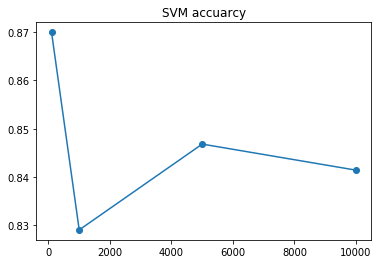

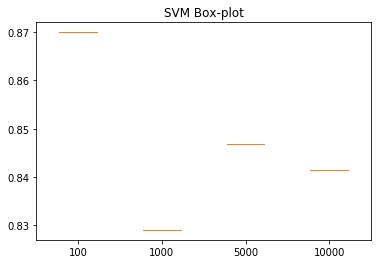

*************************
test set size 100
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=100, Test Accuracy 86.800
*************************
test set size 1000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=1000, Test Accuracy 82.460
*************************
test set size 5000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=5000, Test Accuracy 84.420
*************************
test set size 10000
training round 1
training round 2
training round 3
training round 4
training round 5
Train Size=10000, Test Accuracy 83.674


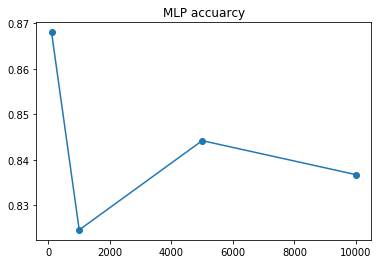

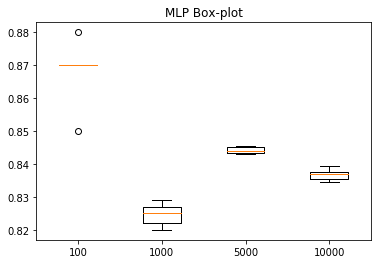

In [2]:
# 测试测试集大小的影响
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.svm import SVC

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
 
# 生成数据
def create_dataset(test_size, train_size=1000, noise=0.1):
    samples_size = train_size + test_size
    X, y = make_circles(n_samples=samples_size, noise=noise, random_state=1)
    X_train, X_test = X[test_size:, :], X[:test_size, :]
    y_train, y_test = y[test_size:], y[:test_size]
    return X_train, y_train, X_test, y_test
 
# mlp训练结果
def train_mlp_model(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=500, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

# svm训练结果
def train_svm_model(X_train, y_train, X_test, y_test):
    svc = SVC()
    svc.fit(X_train, y_train)
    test_acc = svc.score(X_test, y_test)
    return test_acc
 
# 取训练结果的平均值
def avg_score(test_size, model, n_repeats=5):
    X_train, y_train, X_test, y_test = create_dataset(test_size)
    scores = list()
    for i in range(n_repeats):
        print('training round '+ str(i+1))
        score = model(X_train, y_train, X_test, y_test)
        scores.append(score)
    return scores
 
# 测试不同测试集大小
sizes = [100, 1000, 5000, 10000]
score_sets, means = list(), list()
for test_size in sizes:
    print("*************************")
    print("test set size "+str(test_size))
    scores = avg_score(test_size, train_svm_model)
    score_sets.append(scores)
    mean_score = mean(scores)
    means.append(mean_score)
    print('Test Size=%d, Test Accuracy %.3f' % (test_size, mean_score*100))
plt.title("SVM accuarcy")
plt.plot(sizes, means, marker='o')
plt.show()
plt.title("SVM Box-plot")
plt.boxplot(score_sets, labels=sizes)
plt.show()

# 测试不同测试集大小
sizes = [100, 1000, 5000, 10000]
score_sets, means = list(), list()
for test_size in sizes:
    print("*************************")
    print("test set size "+str(test_size))
    scores = avg_score(test_size, train_mlp_model)
    score_sets.append(scores)
    mean_score = mean(scores)
    means.append(mean_score)
    print('Train Size=%d, Test Accuracy %.3f' % (test_size, mean_score*100))
plt.title("MLP accuarcy")
plt.plot(sizes, means, marker='o')
plt.show()
plt.title("MLP Box-plot")
plt.boxplot(score_sets, labels=sizes)
plt.show()